In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os
%matplotlib inline

In [2]:
raw_data_train = pd.read_csv("train.csv")
raw_data_test = pd.read_csv("train.csv")
raw_data=pd.concat([raw_data_train,raw_data_test])
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
raw_data['pickup_datetime'] = pd.to_datetime(raw_data['pickup_datetime'])

In [25]:
len(raw_data)

2917288

In [32]:
date_series = pd.Series(date)

In [34]:
raw_data['pickup_day']=date_series

In [35]:
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [37]:
def add_day_and_hour():
    day = []
    hour = []
    for i in range(len(raw_data)):
        day.append(raw_data['pickup_datetime'].iloc[i].date())
        hour.append(raw_data['pickup_datetime'].iloc[i].hour)
    day_series = pd.Series(day)
    hour_series = pd.Series(hour)
    raw_data['day'] = day_series
    raw_data['hour'] = hour_series

In [38]:
add_day_and_hour()

In [39]:
raw_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,day,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,2016-03-14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,2016-06-12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,2016-01-19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,2016-04-06,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,2016-03-26,13


In [42]:
pre_data = raw_data[['pickup_longitude','pickup_latitude','day','hour']]

In [53]:
pre_data.to_csv('./dataframeday/{}'.format(1))

In [66]:
def save_df_by_hour():
    i = 1
    for i in range(24):
        os.mkdir('./Hour/{}'.format(i))
    for day, df_day in pre_data.groupby('day'):
        for hour,df_hour in df_day.groupby('hour'):
            df_hour.to_csv('./Hour/{}/{}'.format(hour,i))
            i = i+1

In [67]:
save_df_by_hour()

In [91]:
sample_df = pd.read_csv('./Hour/0/23')
sample_df2 = pd.read_csv('./Hour/0/47')

(288, 432, 3)
(288, 432)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  app.launch_new_instance()


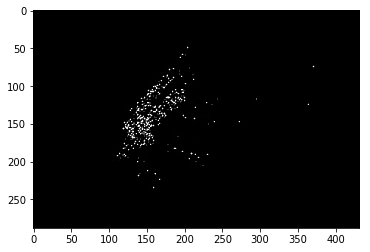

In [195]:
llon = -74.06
llat = 40.65
rlon = -73.8
rlat = 40.85

plt.clf()
plt.xlim(-74.06,-73.8)
plt.ylim(40.65,40.85)
plt.axis('off')
plt.scatter(sample_df['pickup_longitude'],sample_df['pickup_latitude'],s=0.1,alpha=1
            ,color='black',cmap='Greys')
plt.savefig('./try/1.jpg')

from scipy import misc
plt.clf()
read_data = misc.imread('./try/1.jpg')
print(read_data.shape)
plt.imshow(read_data[:,:,0],cmap='Greys')
print(read_data[:,:,0].shape)

In [196]:
def save_fig_by_day():
    dir = './Hour/'
    pic_dir = './Picture/'
    for folders in os.listdir(dir):
        os.mkdir(pic_dir+folders)
        for file in os.listdir(dir+folders):
            df = pd.read_csv(dir+folders+'/'+file)
            plt.clf()
            plt.xlim(-74.06,-73.8)
            plt.ylim(40.65,40.85)
            plt.axis('off')
            plt.scatter(df['pickup_longitude'],df['pickup_latitude'],s=0.1,alpha=1,color='black')
            plt.savefig(pic_dir+folders+'/'+file+'.jpg')       

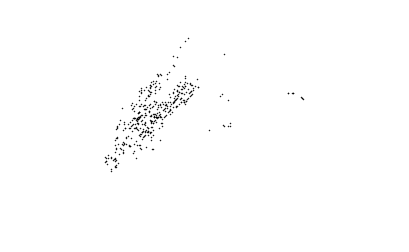

In [198]:
save_fig_by_day()